<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


### Load Data From CSV File


In [2]:
df= pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv')
# read csv file from URL
df.head() 

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [3]:
df.shape

(346, 10)

### Convert to date time object


In [4]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [5]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


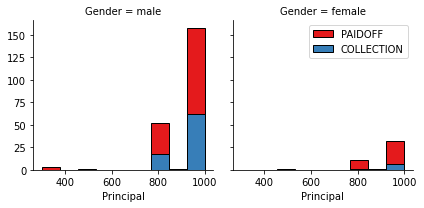

In [6]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

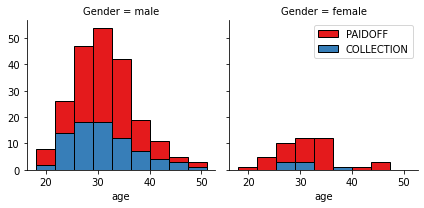

In [7]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


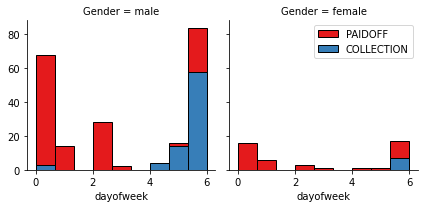

In [8]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [9]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [10]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [11]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [12]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [13]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [14]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [15]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [16]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [17]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [18]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=5) # 80% training, 20% testing
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [19]:
# Using KNN
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

# Find the best k
K_range = 10
mean_acc = np.zeros((K_range-1))
std_acc = np.zeros((K_range-1)) # create vector to store mean accuracy and standard deviation

for i in range(1,K_range):
    neigh = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train) # train the model with KNN
    yhat = neigh.predict(X_test)
    
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat) 
    std_acc[i-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0]) # calculate the test set accuracy and standard deviation

print("The test accuracy with different K values:",mean_acc)
print()
print( "The best accuracy was with", mean_acc.max(), "with K=", mean_acc.argmax()+1) 

The test accuracy with different K values: [0.65714286 0.68571429 0.7        0.71428571 0.7        0.67142857
 0.68571429 0.7        0.68571429]

The best accuracy was with 0.7142857142857143 with K= 4


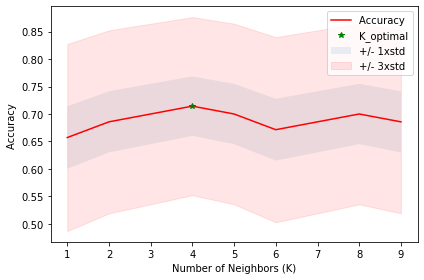

In [20]:
# Visualisation of optimal value of K
plt.plot(range(1,K_range),mean_acc,'r')
plt.fill_between(range(1,K_range),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,K_range),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="red")
plt.plot(mean_acc.argmax()+1,mean_acc.max(),'g*',alpha=1)
plt.legend(('Accuracy ','K_optimal', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()

In [50]:
#KNN model with k = 4 
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

# Decision Tree


In [21]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4) # criterion = entropy shows information gain
loanTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [22]:
loanTree.fit(X_train,y_train) # training the model with the train set from train_loan.csv

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [23]:
predTree = loanTree.predict(X_test) # predictions made with the test set from train_loan.csv
print (predTree[0:5])
print (y_test[0:5])
print()
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test,predTree))

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'COLLECTION' 'PAIDOFF' 'COLLECTION' 'PAIDOFF']

DecisionTrees's Accuracy:  0.6857142857142857


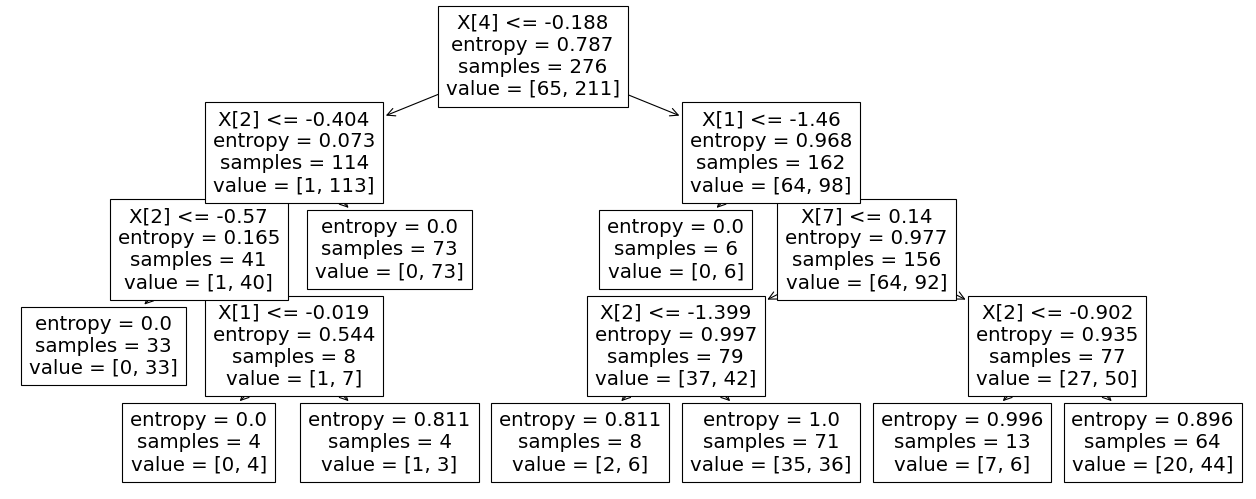

In [24]:
fig = plt.figure(figsize=(20,8),dpi=80) 
tree.plot_tree(loanTree) # visualise the decision tree
plt.show()

# Support Vector Machine


In [25]:
# train the SVM model using train set 
from sklearn import svm
loanL = svm.SVC(kernel='linear') # using linear transformation
loanL.fit(X_train, y_train) 
yhat_svmL = loanL.predict(X_test)
print('Predicted result:',yhat_svmL[0:5])
print()
print('Test set:',y_test[0:5])

Predicted result: ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']

Test set: ['PAIDOFF' 'COLLECTION' 'PAIDOFF' 'COLLECTION' 'PAIDOFF']


In [26]:
# train the SVM model using polynomial transformation
loanP = svm.SVC(kernel='poly')
loanP.fit(X_train, y_train) 
yhat_svmP = loanP.predict(X_test)
print('Predicted result:',yhat_svmP[0:5])
print()
print('Test set:',y_test[0:5])

Predicted result: ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']

Test set: ['PAIDOFF' 'COLLECTION' 'PAIDOFF' 'COLLECTION' 'PAIDOFF']


In [27]:
# train the SVM model using Radial basis function (RBF) transformation
loanR = svm.SVC(kernel='rbf')
loanR.fit(X_train, y_train) 
yhat_svmR = loanR.predict(X_test)
print('Predicted result:',yhat_svmR[0:5])
print()
print('Test set:',y_test[0:5])

Predicted result: ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']

Test set: ['PAIDOFF' 'COLLECTION' 'PAIDOFF' 'COLLECTION' 'PAIDOFF']


In [28]:
# train the SVM model using Sigmoid transformation
loanS = svm.SVC(kernel='sigmoid')
loanS.fit(X_train, y_train) 
yhat_svmS = loanS.predict(X_test)
print('Predicted result:',yhat_svmS[0:5])
print()
print('Test set:',y_test[0:5])

Predicted result: ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION']

Test set: ['PAIDOFF' 'COLLECTION' 'PAIDOFF' 'COLLECTION' 'PAIDOFF']


In [29]:
# Evaluation
from sklearn.metrics import classification_report, confusion_matrix
# Compute confusion matrix
cnf_matrixL = confusion_matrix(y_test, yhat_svmL, labels=["PAIDOFF","COLLECTION"])
cnf_matrixP = confusion_matrix(y_test, yhat_svmP, labels=["PAIDOFF","COLLECTION"])
cnf_matrixR = confusion_matrix(y_test, yhat_svmR, labels=["PAIDOFF","COLLECTION"])
cnf_matrixS = confusion_matrix(y_test, yhat_svmS, labels=["PAIDOFF","COLLECTION"])

print (classification_report(y_test, yhat_svmL,))
print()
print (classification_report(y_test, yhat_svmP))
print()
print (classification_report(y_test, yhat_svmR))
print()
print (classification_report(y_test, yhat_svmS))

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        21
     PAIDOFF       0.70      0.98      0.81        49

    accuracy                           0.69        70
   macro avg       0.35      0.49      0.41        70
weighted avg       0.49      0.69      0.57        70


              precision    recall  f1-score   support

  COLLECTION       0.50      0.10      0.16        21
     PAIDOFF       0.71      0.96      0.82        49

    accuracy                           0.70        70
   macro avg       0.61      0.53      0.49        70
weighted avg       0.65      0.70      0.62        70


              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        21
     PAIDOFF       0.70      1.00      0.82        49

    accuracy                           0.70        70
   macro avg       0.35      0.50      0.41        70
weighted avg       0.49      0.70      0.58        70


              pr

C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


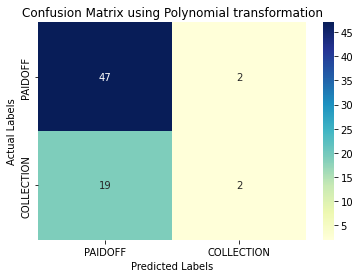

In [30]:
# Use Seaborn heatmap to create the plot
# plot confusion matrix for polynomial transformation since the rest three models have invalid F-socre and Precision
plot_cnf = sns.heatmap(cnf_matrixP, annot=True, cmap='YlGnBu')

# labels the title and x, y axis of plot
plot_cnf.set_title('Confusion Matrix using Polynomial transformation');
plot_cnf.set_xlabel('Predicted Labels')
plot_cnf.set_ylabel('Actual Labels');

# labels the boxes
plot_cnf.xaxis.set_ticklabels(['PAIDOFF','COLLECTION'])
plot_cnf.yaxis.set_ticklabels(['PAIDOFF','COLLECTION'])
plt.show()

# Logistic Regression


In [31]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train) # using liblinear library as optimiser
LR

LogisticRegression(C=0.01, solver='liblinear')

In [32]:
yhat_LR = LR.predict(X_test)
print("The predicted result:",yhat_LR[0:5])
print()
print("The test set:", y_test[0:5])

The predicted result: ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']

The test set: ['PAIDOFF' 'COLLECTION' 'PAIDOFF' 'COLLECTION' 'PAIDOFF']


In [33]:
yhat_probLR = LR.predict_proba(X_test)
yhat_probLR[0:5] # probability by labeled classes

array([[0.4966911 , 0.5033089 ],
       [0.47301059, 0.52698941],
       [0.49098147, 0.50901853],
       [0.49859458, 0.50140542],
       [0.47438892, 0.52561108]])

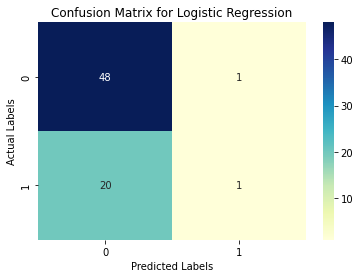

In [34]:
# calculate confusion matirx for logistic regression
cnf_matrixLR = confusion_matrix(y_test, yhat_LR,labels=["PAIDOFF","COLLECTION"])
# plot confusion matrix
plot_cnfLR = sns.heatmap(cnf_matrixLR, annot=True, cmap='YlGnBu')

# labels the title and x, y axis of plot
plot_cnfLR.set_title('Confusion Matrix for Logistic Regression');
plot_cnfLR.set_xlabel('Predicted Labels')
plot_cnfLR.set_ylabel('Actual Labels');

# labels the boxes
plot_cnf.xaxis.set_ticklabels(['PAIDOFF','COLLECTION'])
plot_cnf.yaxis.set_ticklabels(['PAIDOFF','COLLECTION'])
plt.show()

**Notice: The testing data used for the models above is not from loan_train.csv**

# Model Evaluation using Test set


In [35]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:


### Load Test set for evaluation


In [36]:
test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [37]:
test_df.shape

(54, 10)

### Data Cleaning

In [38]:
# change to the time object
test_df['due_date'] = pd.to_datetime(df['due_date'])
test_df['effective_date'] = pd.to_datetime(df['effective_date'])
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-08,2016-10-07,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-08,2016-09-22,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-09,2016-10-08,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-09,2016-10-08,29,Bechalor,male


### data pre-processing

In [39]:
test_df['loan_status'].value_counts()

PAIDOFF       40
COLLECTION    14
Name: loan_status, dtype: int64

In [40]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True) # change male to 0, female to 1
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1
1,5,5,PAIDOFF,300,7,2016-09-08,2016-10-07,35,Master or Above,0
2,21,21,PAIDOFF,1000,30,2016-09-08,2016-09-22,43,High School or Below,1
3,24,24,PAIDOFF,1000,30,2016-09-09,2016-10-08,26,college,0
4,35,35,PAIDOFF,800,15,2016-09-09,2016-10-08,29,Bechalor,0


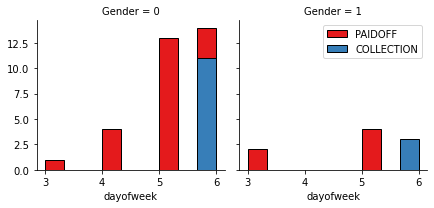

In [41]:
# analyse day of week when people get loans
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
bins_test = np.linspace(test_df.dayofweek.min(), test_df.dayofweek.max(), 10)
g_test = sns.FacetGrid(test_df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g_test.map(plt.hist, 'dayofweek', bins=bins_test, ec="k")
g_test.axes[-1].legend()
plt.show()

In [42]:
# from the above graph, we can tell people get loan on the last day of a week fail to pay it off
# so the threshold should be set less than day 6
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>5) else 0) 
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-08,2016-10-07,35,Master or Above,0,3,0
2,21,21,PAIDOFF,1000,30,2016-09-08,2016-09-22,43,High School or Below,1,3,0
3,24,24,PAIDOFF,1000,30,2016-09-09,2016-10-08,26,college,0,4,0
4,35,35,PAIDOFF,800,15,2016-09-09,2016-10-08,29,Bechalor,0,4,0


In [43]:
test_df.groupby(['education'])['loan_status'].value_counts(normalize=True) # education status 

education             loan_status
Bechalor              PAIDOFF        1.000000
High School or Below  PAIDOFF        0.523810
                      COLLECTION     0.476190
Master or Above       PAIDOFF        1.000000
college               PAIDOFF        0.826087
                      COLLECTION     0.173913
Name: loan_status, dtype: float64

In [44]:
# get features of the test data 
Feature_test = test_df[['Principal','terms','age','Gender','weekend']]
Feature_test = pd.concat([Feature_test,pd.get_dummies(test_df['education'])],axis=1)
Feature_test.drop(['Master or Above'],axis=1,inplace=True) # drop the category of Master or Above as it is incomplete 
Feature_test.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,0,0,0,0
2,1000,30,43,1,0,0,1,0
3,1000,30,26,0,0,0,0,1
4,800,15,29,0,0,1,0,0


In [45]:
# Define feature sets
X1 = Feature_test
X1[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,0,0,0,0
2,1000,30,43,1,0,0,1,0
3,1000,30,26,0,0,0,0,1
4,800,15,29,0,0,1,0,0


In [46]:
# dependent labels
y1 = test_df['loan_status'].values
y1[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [47]:
# normalise data
X1= preprocessing.StandardScaler().fit(X1).transform(X1)
X1[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.11803399,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054, -1.11803399,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211, -1.11803399,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054, -1.11803399,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054, -1.11803399,
         2.39791576, -0.79772404, -0.86135677]])

### KNN

In [51]:
yhat1 = neigh.predict(X1)
yhat1[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [53]:
jaccard_score(y1, yhat1,pos_label='PAIDOFF') # Jaccard index 

0.6875

In [58]:
jaccard_score(y1, yhat1,pos_label='COLLECTION') # Jaccard index 

0.2857142857142857

In [74]:
jaccard_score(y1, yhat1,average='weighted') # Jaccard index weighted average

0.5833333333333334

In [54]:
print (classification_report(y1, yhat1)) # F1-score

              precision    recall  f1-score   support

  COLLECTION       0.46      0.43      0.44        14
     PAIDOFF       0.80      0.82      0.81        40

    accuracy                           0.72        54
   macro avg       0.63      0.63      0.63        54
weighted avg       0.72      0.72      0.72        54



### Decision Tree

In [56]:
predTree1 = loanTree.predict(X1)
print (predTree1[0:5])

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [57]:
jaccard_score(y1, predTree1,pos_label='PAIDOFF') # Jaccard index 

0.7222222222222222

In [59]:
jaccard_score(y1, predTree1,pos_label='COLLECTION') # Jaccard index 

0.0

In [75]:
jaccard_score(y1, predTree1,average='weighted') # Jaccard index weighted average

0.5349794238683128

In [60]:
print (classification_report(y1, predTree1)) # F1-score

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        14
     PAIDOFF       0.74      0.97      0.84        40

    accuracy                           0.72        54
   macro avg       0.37      0.49      0.42        54
weighted avg       0.55      0.72      0.62        54



### SVM

In [62]:
yhat_svmP1 = loanP.predict(X1)
print(yhat_svmP1[0:5])

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [63]:
jaccard_score(y1, yhat_svmP1,pos_label='PAIDOFF') # Jaccard index 

0.7647058823529411

In [64]:
jaccard_score(y1, yhat_svmP1,pos_label='COLLECTION') # Jaccard index 

0.2

In [76]:
jaccard_score(y1, yhat_svmP1,average='weighted') # Jaccard index weighted average

0.6183006535947712

In [65]:
print (classification_report(y1, yhat_svmP1)) # F1-score

              precision    recall  f1-score   support

  COLLECTION       0.75      0.21      0.33        14
     PAIDOFF       0.78      0.97      0.87        40

    accuracy                           0.78        54
   macro avg       0.77      0.59      0.60        54
weighted avg       0.77      0.78      0.73        54



### Logistic Regression

In [67]:
yhat_LR1 = LR.predict(X1)
print(yhat_LR1[0:5])

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [72]:
yhat_prob1 = LR.predict_proba(X1)
yhat_prob1[0:5]

array([[0.31582889, 0.68417111],
       [0.26307061, 0.73692939],
       [0.31940565, 0.68059435],
       [0.32108857, 0.67891143],
       [0.31277558, 0.68722442]])

In [68]:
jaccard_score(y1, yhat_LR1,pos_label='PAIDOFF') # Jaccard index 

0.7169811320754716

In [69]:
jaccard_score(y1, yhat_LR1,pos_label='COLLECTION') # Jaccard index 

0.0625

In [77]:
jaccard_score(y1, yhat_LR1,average='weighted') # Jaccard index weighted average

0.5473008385744235

In [70]:
print (classification_report(y1, yhat_LR1)) # F1-score

              precision    recall  f1-score   support

  COLLECTION       0.33      0.07      0.12        14
     PAIDOFF       0.75      0.95      0.84        40

    accuracy                           0.72        54
   macro avg       0.54      0.51      0.48        54
weighted avg       0.64      0.72      0.65        54



In [73]:
log_loss(y1, yhat_prob1) # LogLoss

0.5455421134563065

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.58       | 0.72        | NA      |
| Decision Tree      | 0.53       | 0.62        | NA      |
| SVM                | 0.62       | 0.73        | NA      |
| LogisticRegression | 0.55       | 0.65        | 0.55       |


**Notice: Here I report the weighted average Jaccard scores and wighted average F1-scores.**

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
